In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'D:\Data Analyst stuffs\Python stuffs\Learn Python for Data Analysis\PYTHON_EXERCISES_UDEMY\Uber Case Study\Datasets\uber-raw-data-janjune-15_sample.csv')

df['Pickup_date'] = pd.to_datetime(df['Pickup_date'])
df = df.drop_duplicates()

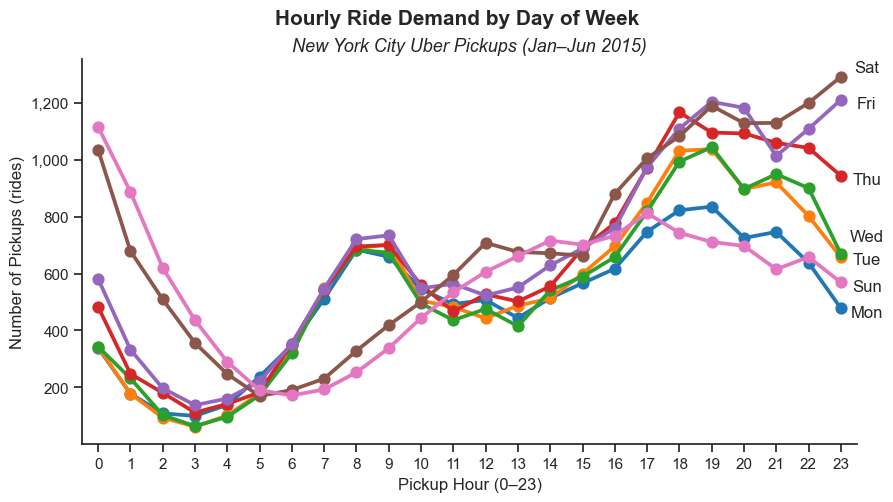

In [ ]:
# FINAL

from adjustText import adjust_text

df['Pickup_day_no'] = df['Pickup_date'].dt.day_of_week
df['Pickup_hour'] = df['Pickup_date'].dt.hour

df_grouped = (
    df.groupby(['Pickup_day_no', 'Pickup_hour'], as_index=False)
    .size()
    .sort_values(['Pickup_day_no', 'Pickup_hour'])
)

df_grouped['Pickup_day'] = pd.to_datetime(df_grouped['Pickup_day_no'].astype(int), unit='D', origin='1900-01-01').dt.strftime('%a')
df_grouped.drop(columns='Pickup_day_no', inplace=True)

sns.set_theme(style='ticks')
plt.figure(figsize=(10, 5))

g = sns.pointplot(
    data=df_grouped,
    x='Pickup_hour',
    y='size',
    hue='Pickup_day',
    palette='tab10',
    legend=False
)
sns.despine()

plt.suptitle('Hourly Ride Demand by Day of Week', fontsize=15, weight='bold')
plt.title('New York City Uber Pickups (Jan–Jun 2015)', fontsize=13, style='italic')
plt.xlabel('Pickup Hour (0–23)')
plt.ylabel('Number of Pickups (rides)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{y:,.0f}'))

# Create the label for each line
texts = []

for i, text in enumerate(df_grouped['Pickup_day'].unique()):
    y_axis = df_grouped[df_grouped['Pickup_hour'] == 23]['size'].iloc[i]
    texts.append(plt.text(23.5, y_axis, text, va='center'))

adjust_text(texts)

# Set the value of the x-axis as the starting position of the label
for t in texts:
    t.set_x(23.8)

plt.show()